In [ ]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

# Directories containing the data
directories = [
    'LSTM_XGBfeatures_nostake',
    'LSTM_XGBfeatures_noweightbalance',
    'LSTM_XGBfeaturesandODDSandWeightbalance',
    'LSTM_nodistance',
    'LSTM_norank'
]

base_path = '/content'  # Adjust this path as necessary

# Initialize empty data structures
training_history_combined = pd.DataFrame()
metrics_combined = {}

# Load and combine data from each directory
for dir_name in directories:
    # Load training history
    training_history_path = os.path.join(base_path, dir_name, 'training_history.csv')
    history_df = pd.read_csv(training_history_path)
    history_df['experiment'] = dir_name
    history_df['epoch'] = history_df.index  # Add epoch column based on row index
    training_history_combined = pd.concat([training_history_combined, history_df])

    # Load metrics
    metrics_path = os.path.join(base_path, dir_name, 'metrics.json')
    with open(metrics_path, 'r') as file:
        metrics = json.load(file)
        metrics_combined[dir_name] = metrics

# Display combined data
print(training_history_combined.head())
print(metrics_combined)


   accuracy      loss       mae       mse  learning_rate        lr  \
0  0.551988  0.673346  0.482311  0.236026       0.000015  0.000015   
1  0.679505  0.619023  0.428917  0.206851       0.000015  0.000015   
2  0.712028  0.594594  0.409069  0.197404       0.000015  0.000015   
3  0.718511  0.585611  0.403012  0.194040       0.000015  0.000015   
4  0.719013  0.581280  0.400136  0.192498       0.000015  0.000015   

                 experiment  epoch  
0  LSTM_XGBfeatures_nostake      0  
1  LSTM_XGBfeatures_nostake      1  
2  LSTM_XGBfeatures_nostake      2  
3  LSTM_XGBfeatures_nostake      3  
4  LSTM_XGBfeatures_nostake      4  
{'LSTM_XGBfeatures_nostake': {'F1 Score': 0.5886474137929609, 'Precision': 0.5296948784226361, 'Recall': 0.6623655697958161, 'Final Accuracy': 0.732191801071167, 'Final Loss': 0.56651771068573, 'Final MAE': 0.38773247599601746, 'Final MSE': 0.18559567630290985, 'Final Learning Rate': 2.747347025433555e-07}, 'LSTM_XGBfeatures_noweightbalance': {'F1 Score':

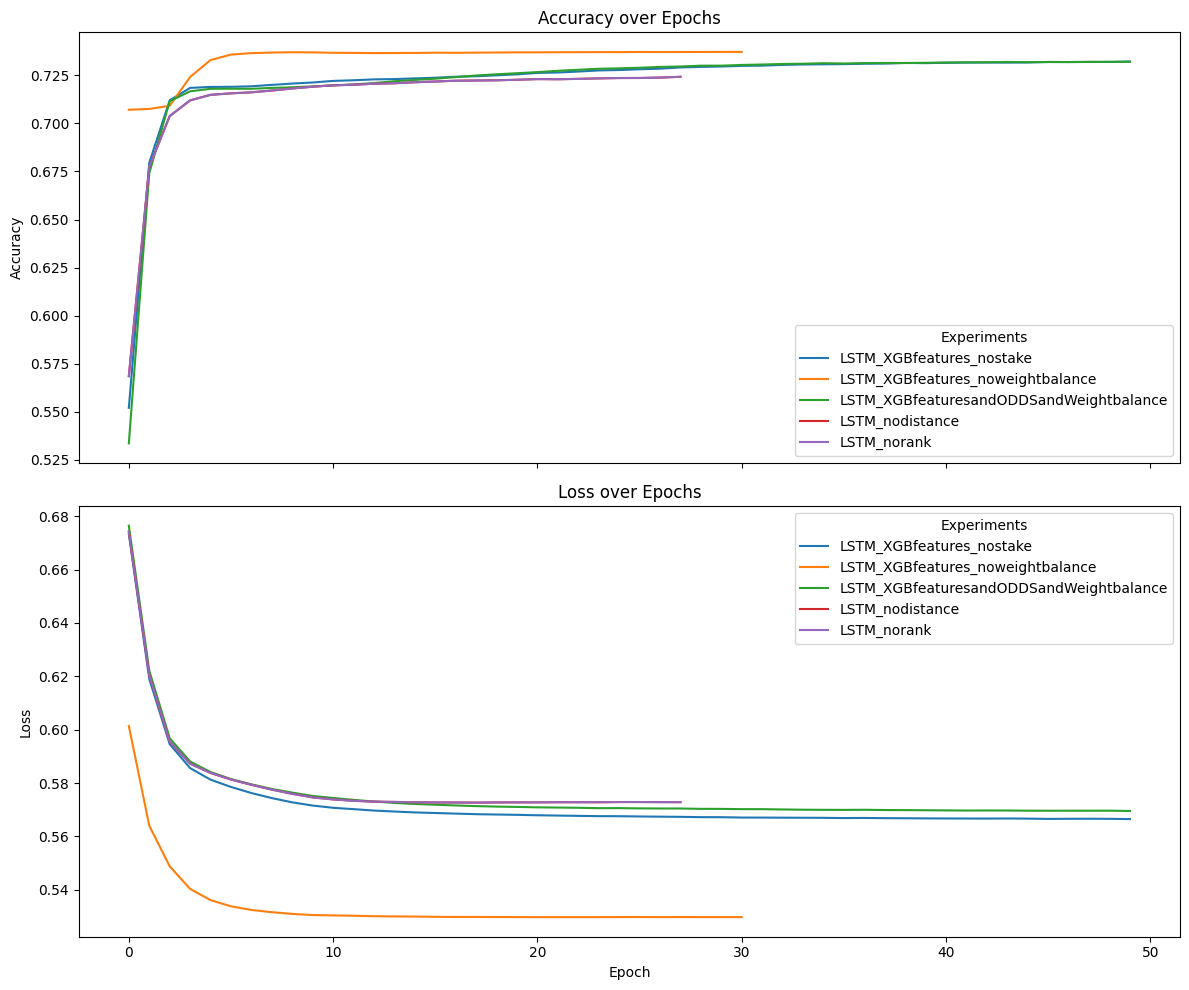

In [ ]:
# Plot training metrics over epochs
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot accuracy
for experiment in directories:
    exp_data = training_history_combined[training_history_combined['experiment'] == experiment]
    axes[0].plot(exp_data['epoch'], exp_data['accuracy'], label=experiment)

axes[0].set_title('Accuracy over Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(title='Experiments')

# Plot loss
for experiment in directories:
    exp_data = training_history_combined[training_history_combined['experiment'] == experiment]
    axes[1].plot(exp_data['epoch'], exp_data['loss'], label=experiment)

axes[1].set_title('Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(title='Experiments')

plt.tight_layout()
plt.show()


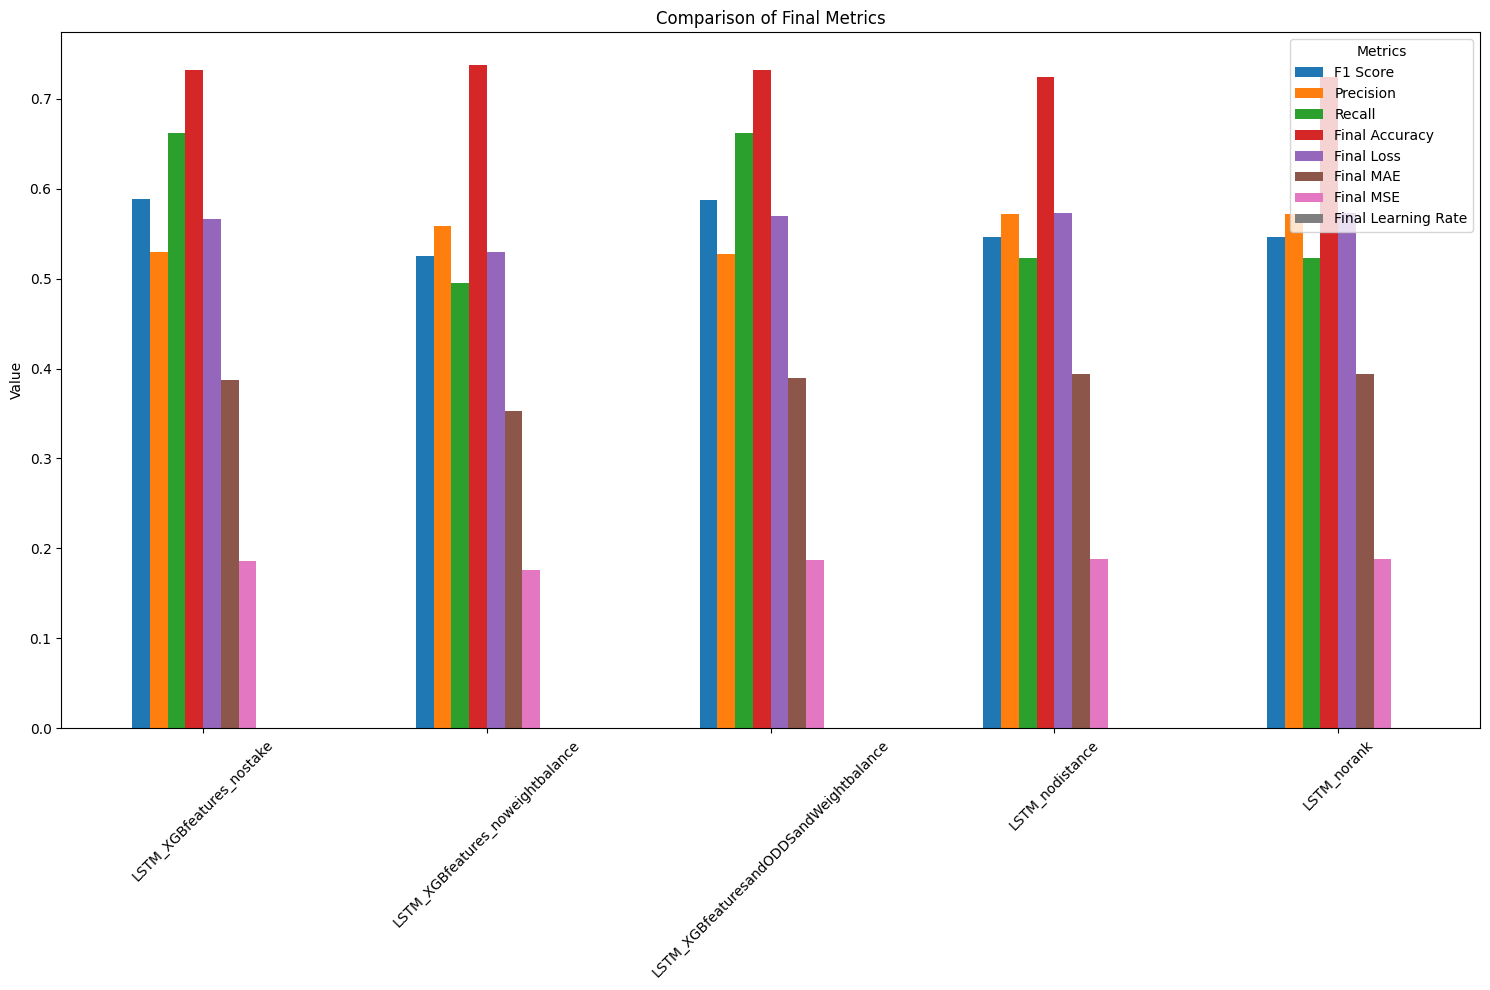

In [ ]:
# Convert metrics_combined to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_combined).T

# Plot final metrics comparison
metrics_df.plot(kind='bar', figsize=(15, 10))
plt.title('Comparison of Final Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# Compute comprehensive statistics
stats = metrics_df.describe().T
print("Comprehensive Statistics:")
print(stats)

# Save the statistics to a CSV file for further analysis
stats.to_csv('/content/comprehensive_statistics.csv')

# Compute the change between best metrics across each directory
best_metrics = metrics_df.idxmax()
change_metrics = metrics_df.loc[best_metrics]
print("Change in Metrics Across Each Directory:")
print(change_metrics)

# Save the change metrics to a CSV file
change_metrics.to_csv('/content/change_in_metrics.csv')


Comprehensive Statistics:
                     count      mean       std           min           25%  \
F1 Score               5.0  0.558688  0.028212  5.247072e-01  5.463290e-01   
Precision              5.0  0.552058  0.022033  5.277433e-01  5.296949e-01   
Recall                 5.0  0.572980  0.082376  4.947593e-01  5.227230e-01   
Final Accuracy         5.0  0.730022  0.005637  7.242797e-01  7.242797e-01   
Final Loss             5.0  0.562316  0.018372  5.297921e-01  5.665177e-01   
Final MAE              5.0  0.383590  0.017354  3.528833e-01  3.877325e-01   
Final MSE              5.0  0.184856  0.005160  1.758020e-01  1.855957e-01   
Final Learning Rate    5.0  0.000001  0.000001  2.747347e-07  2.747347e-07   

                          50%       75%       max  
F1 Score             0.546329  0.587426  0.588647  
Precision            0.558514  0.572168  0.572168  
Recall               0.522723  0.662329  0.662366  
Final Accuracy       0.732124  0.732192  0.737237  
Final Loss 

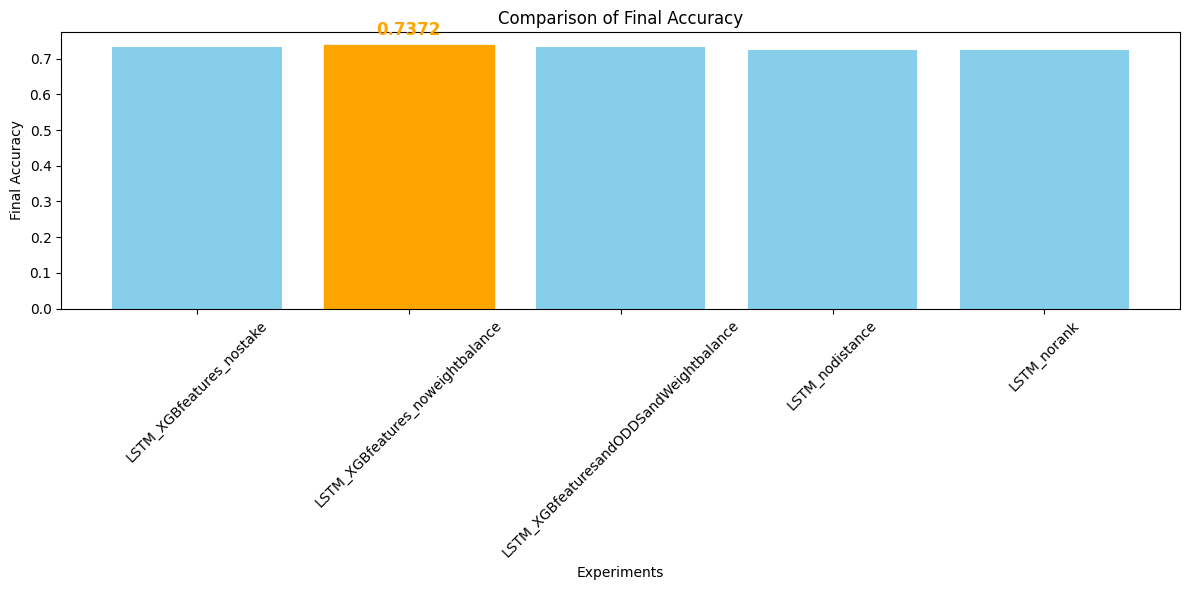

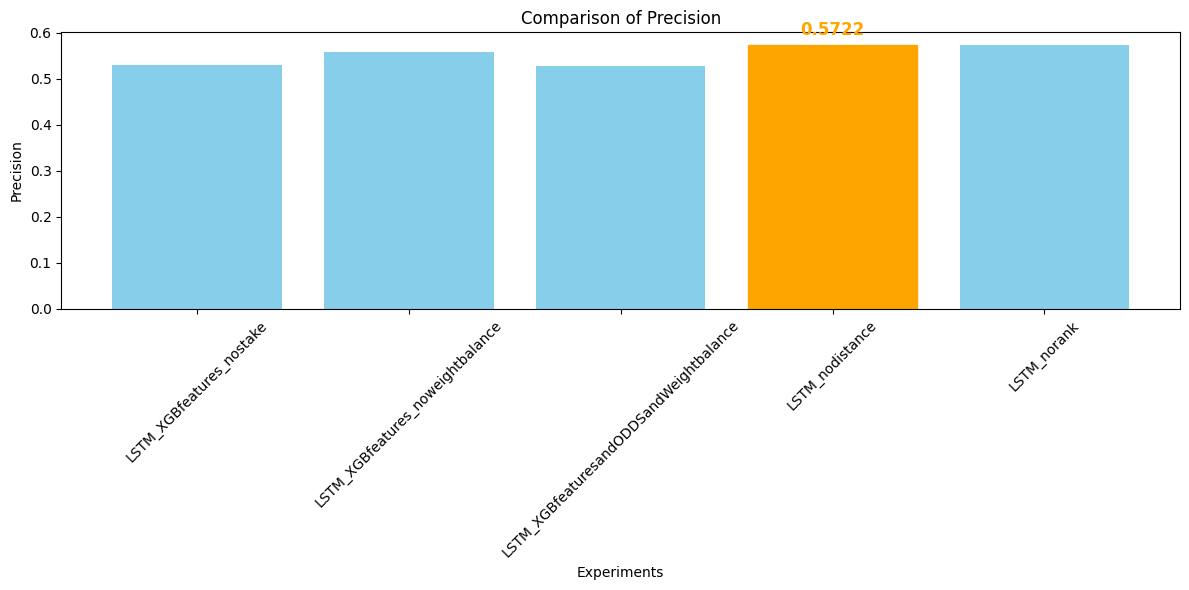

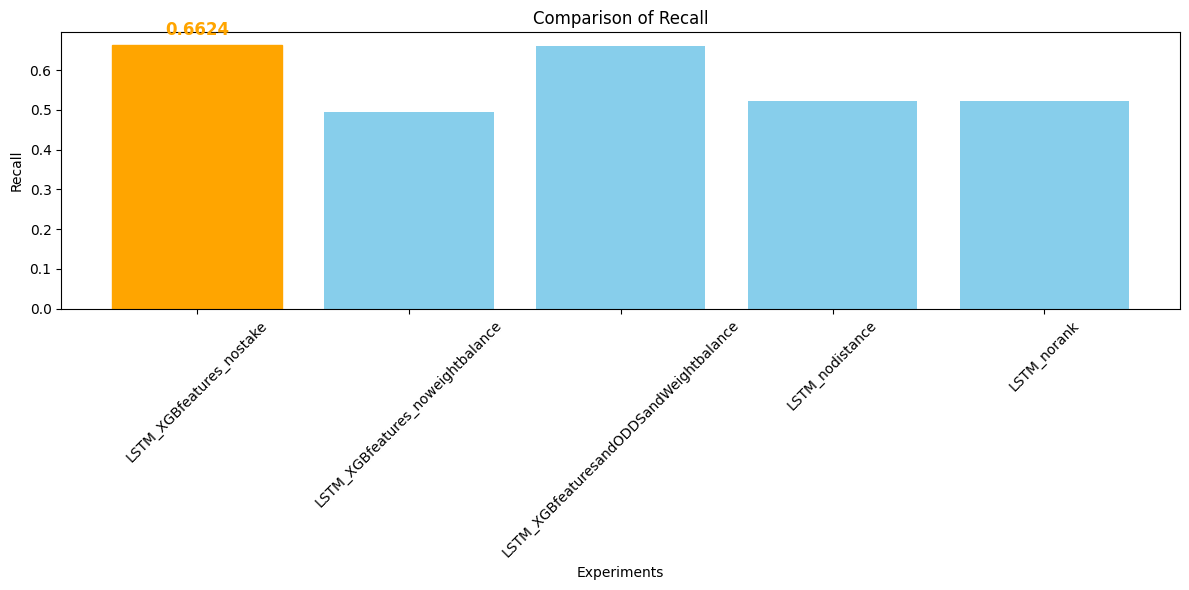

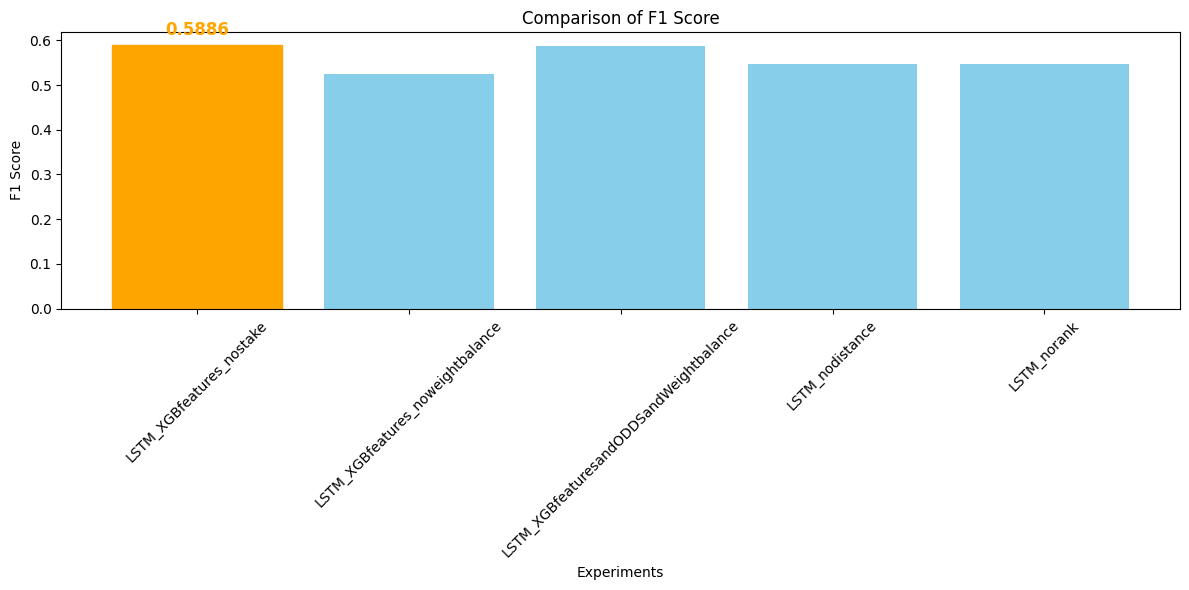

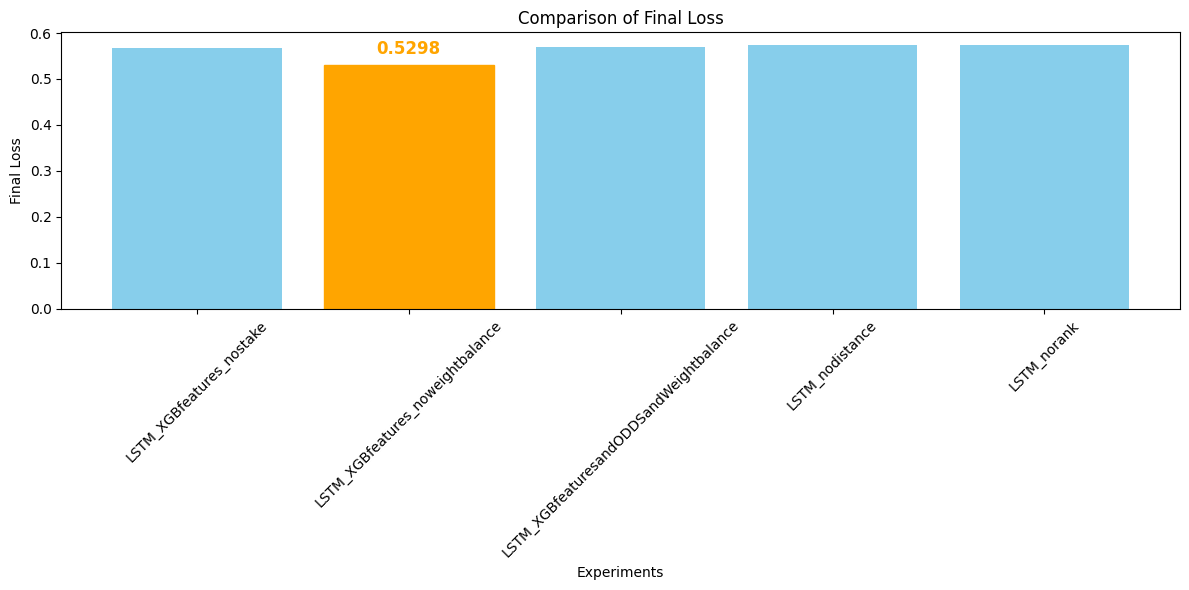

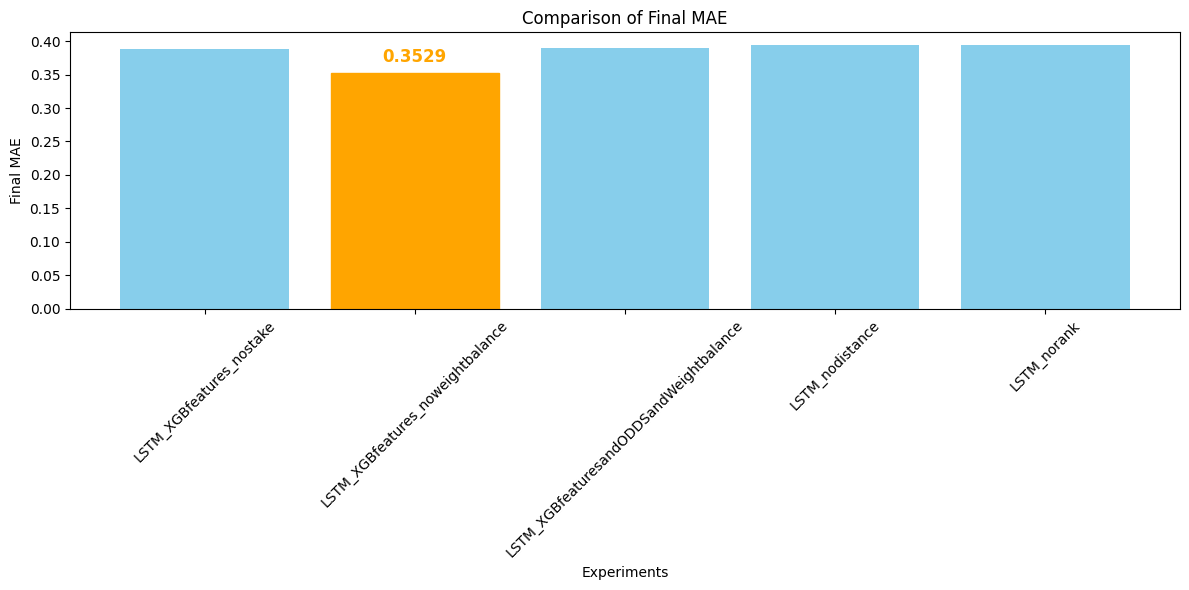

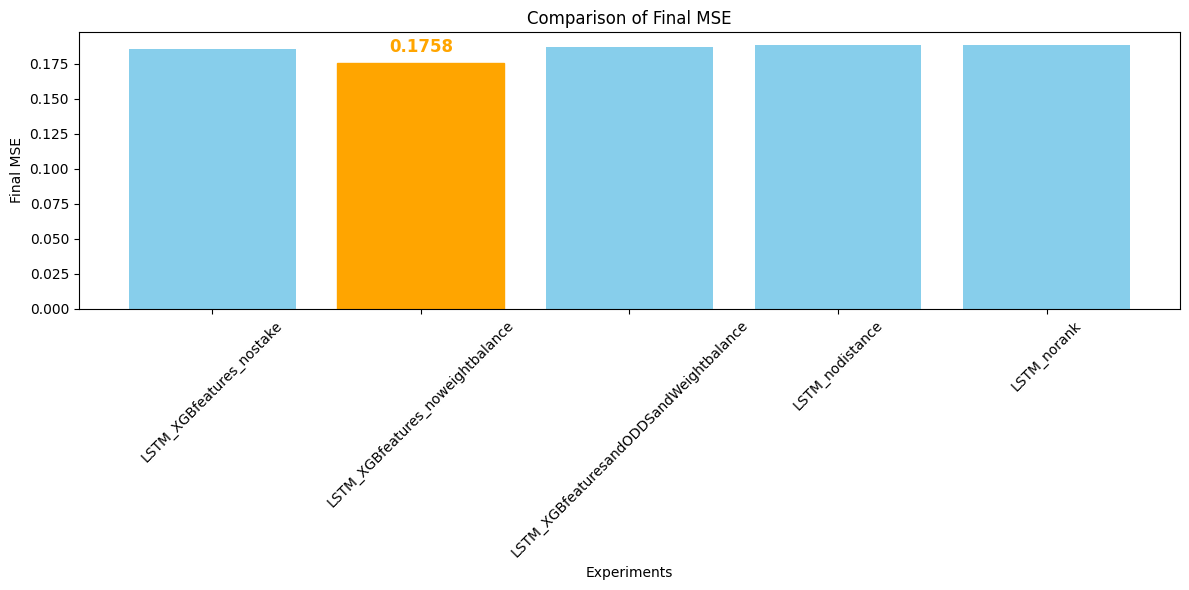

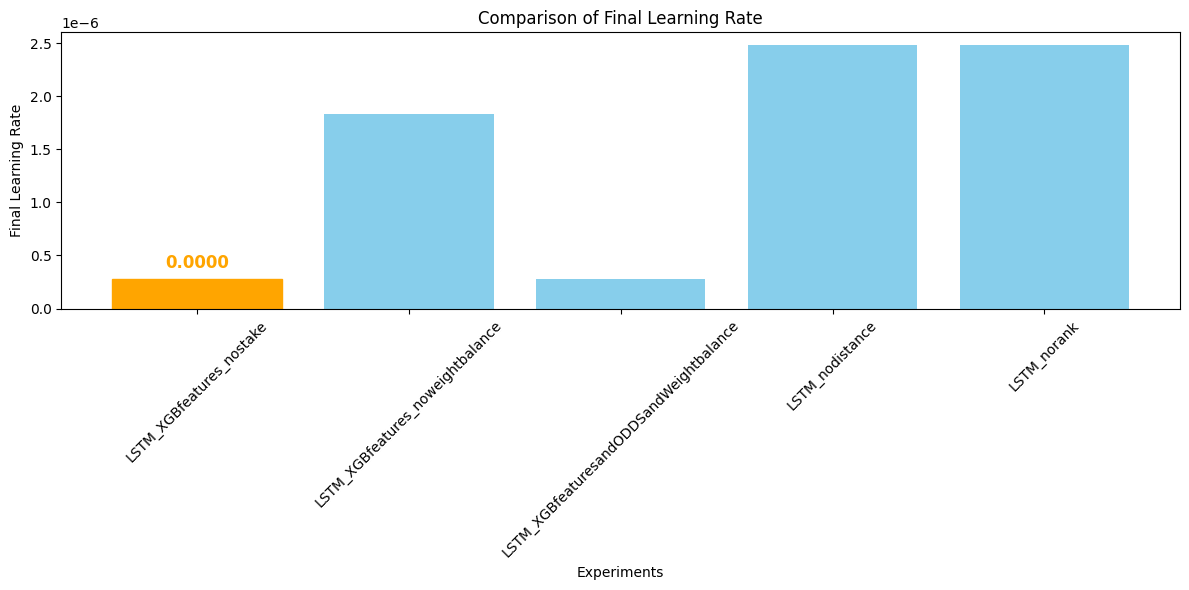

In [ ]:
import matplotlib.pyplot as plt

# Convert metrics_combined to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_combined).T

# Define the metrics for which we will highlight the highest and lowest bars
highlight_max_metrics = ['Final Accuracy', 'Precision', 'Recall', 'F1 Score']
highlight_min_metrics = ['Final Loss', 'Final MAE', 'Final MSE', 'Final Learning Rate']

# Function to plot bar charts with highlighting
def plot_metric(metric, highlight_max=True):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(metrics_df.index, metrics_df[metric], color='skyblue')

    if highlight_max:
        max_value = metrics_df[metric].max()
        max_index = metrics_df[metric].idxmax()
        bar_index = list(metrics_df.index).index(max_index)
        bars[bar_index].set_color('orange')
        plt.annotate(f'{max_value:.4f}', xy=(bar_index, max_value), xytext=(0, 5),
                     textcoords='offset points', ha='center', va='bottom', fontsize=12, color='orange', fontweight='bold')
    else:
        min_value = metrics_df[metric].min()
        min_index = metrics_df[metric].idxmin()
        bar_index = list(metrics_df.index).index(min_index)
        bars[bar_index].set_color('orange')
        plt.annotate(f'{min_value:.4f}', xy=(bar_index, min_value), xytext=(0, 5),
                     textcoords='offset points', ha='center', va='bottom', fontsize=12, color='orange', fontweight='bold')

    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xlabel('Experiments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each metric individually
for metric in highlight_max_metrics:
    plot_metric(metric, highlight_max=True)

for metric in highlight_min_metrics:
    plot_metric(metric, highlight_max=False)


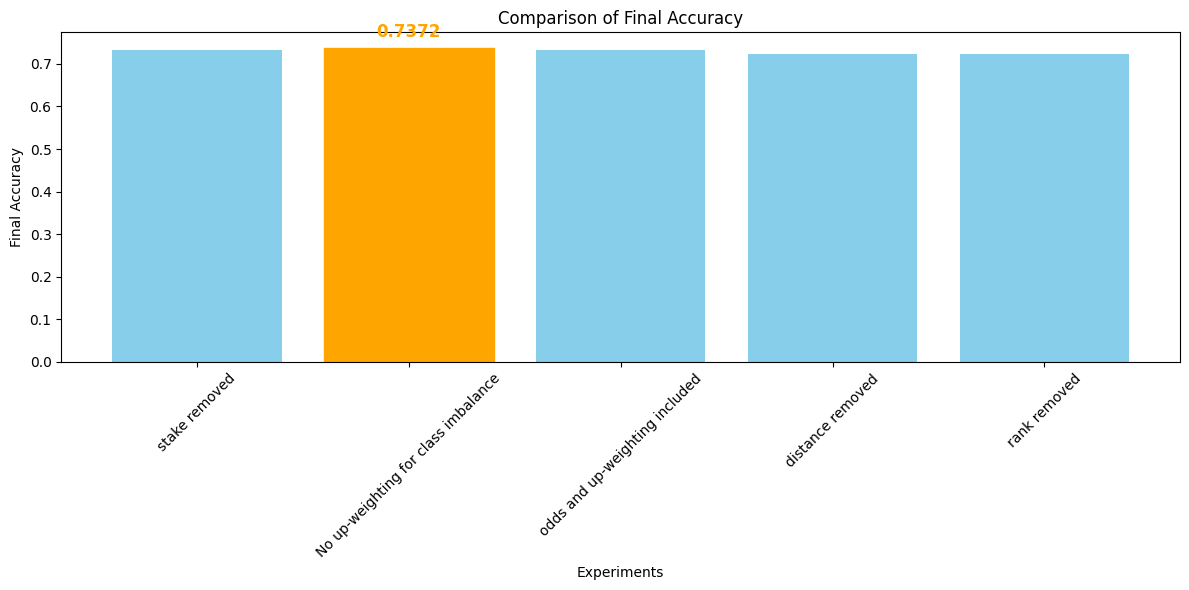

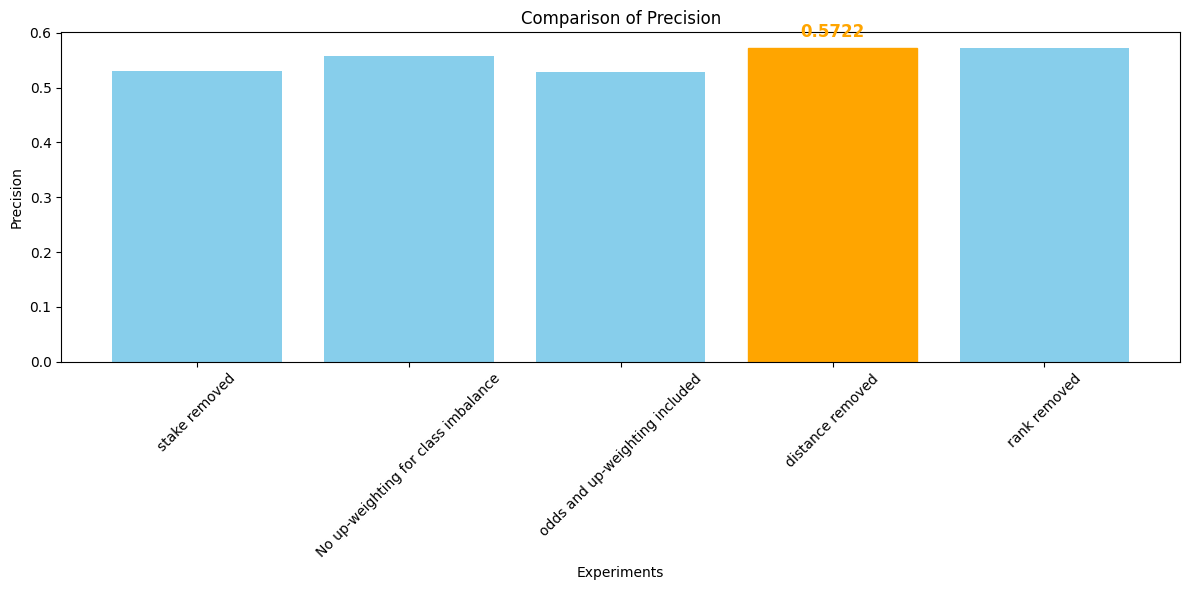

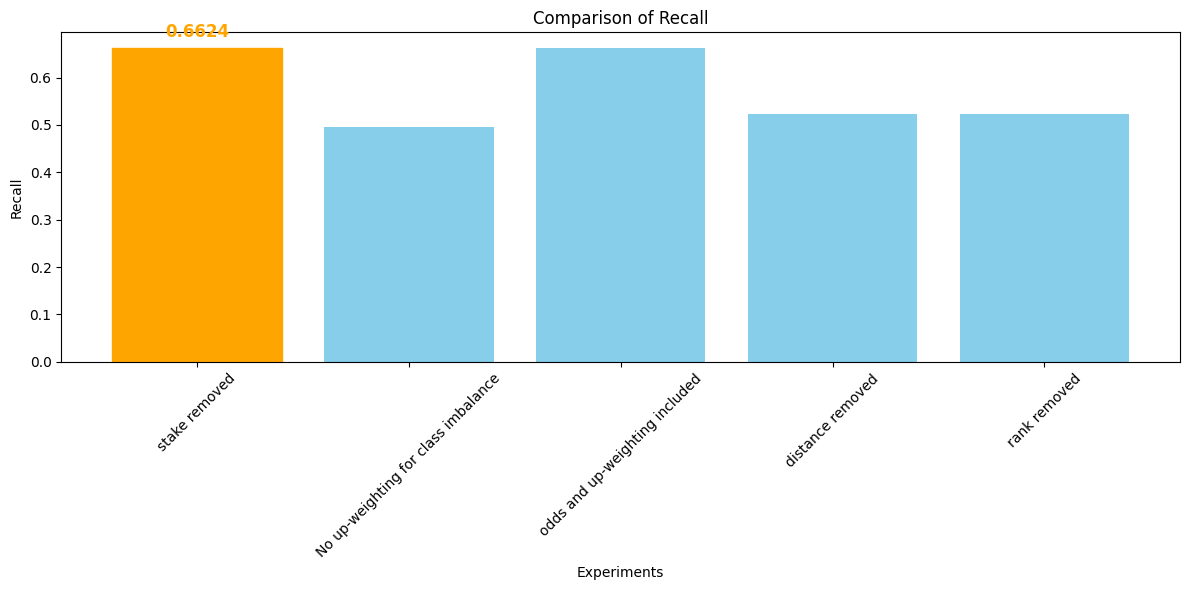

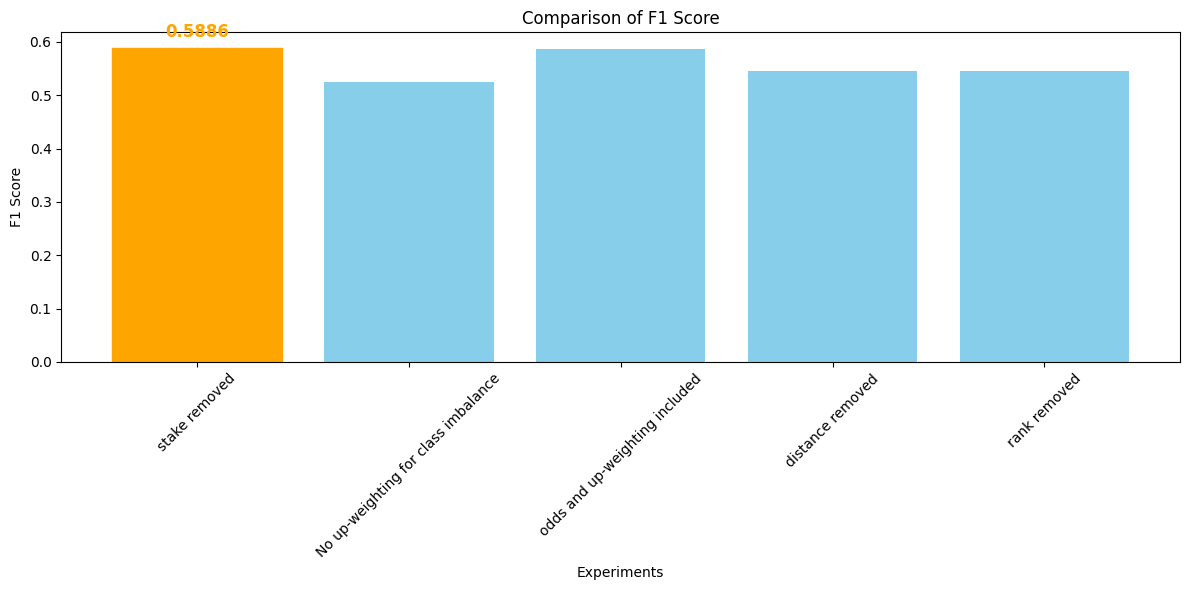

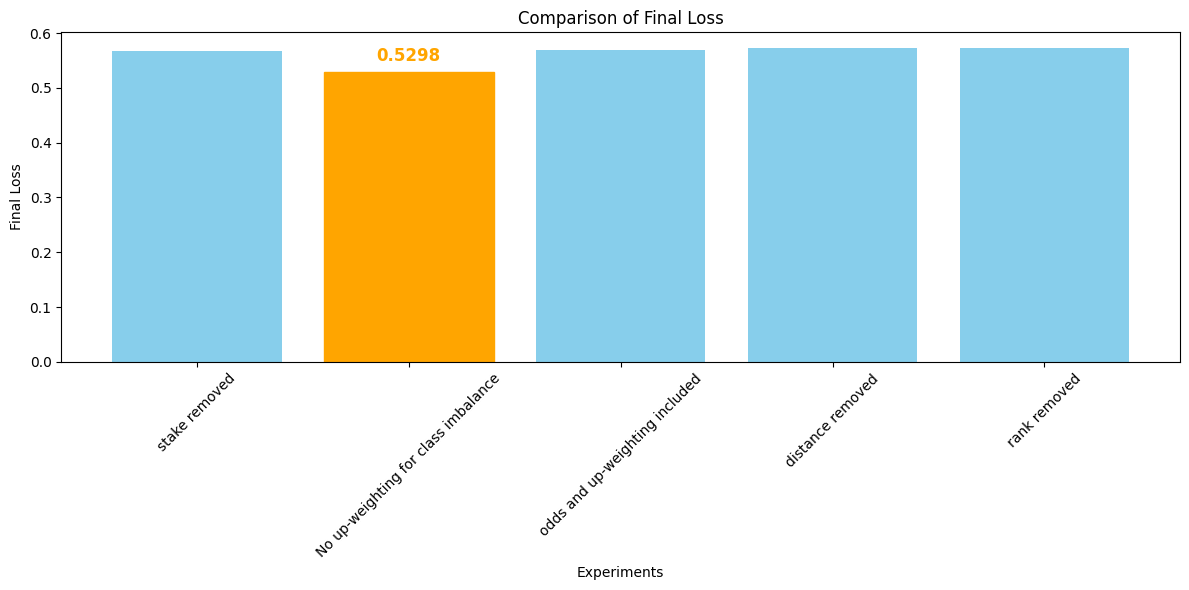

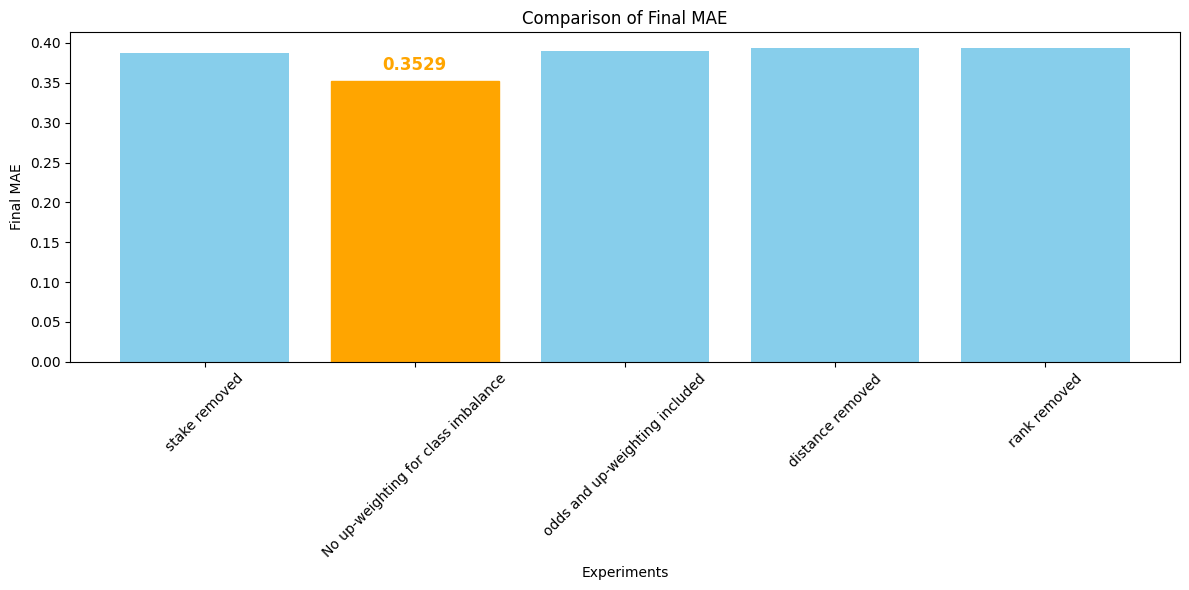

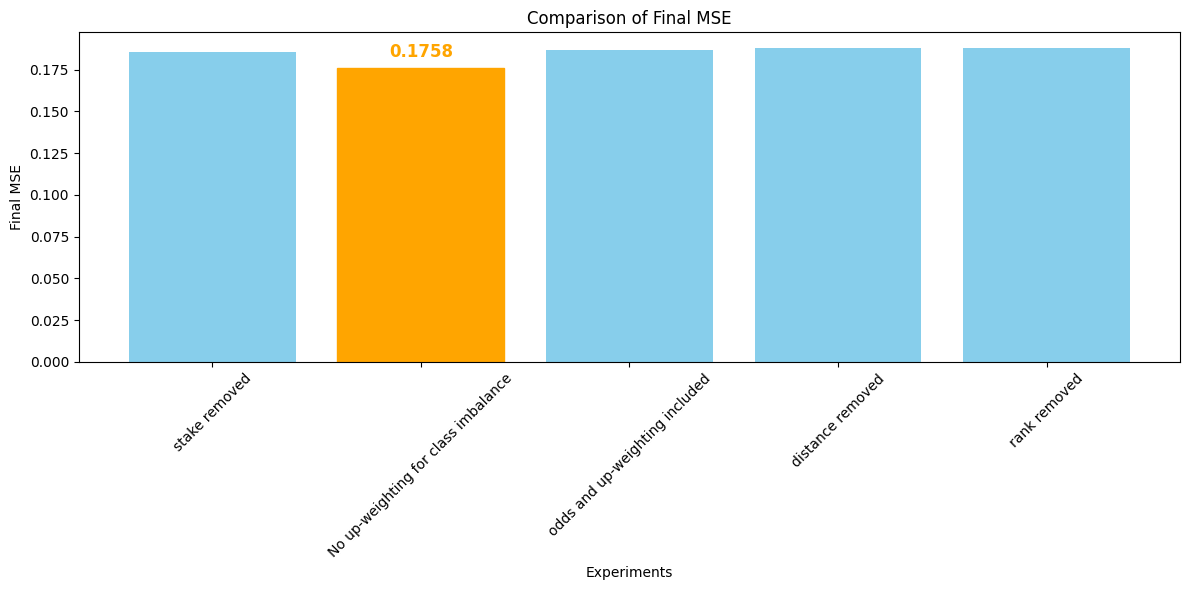

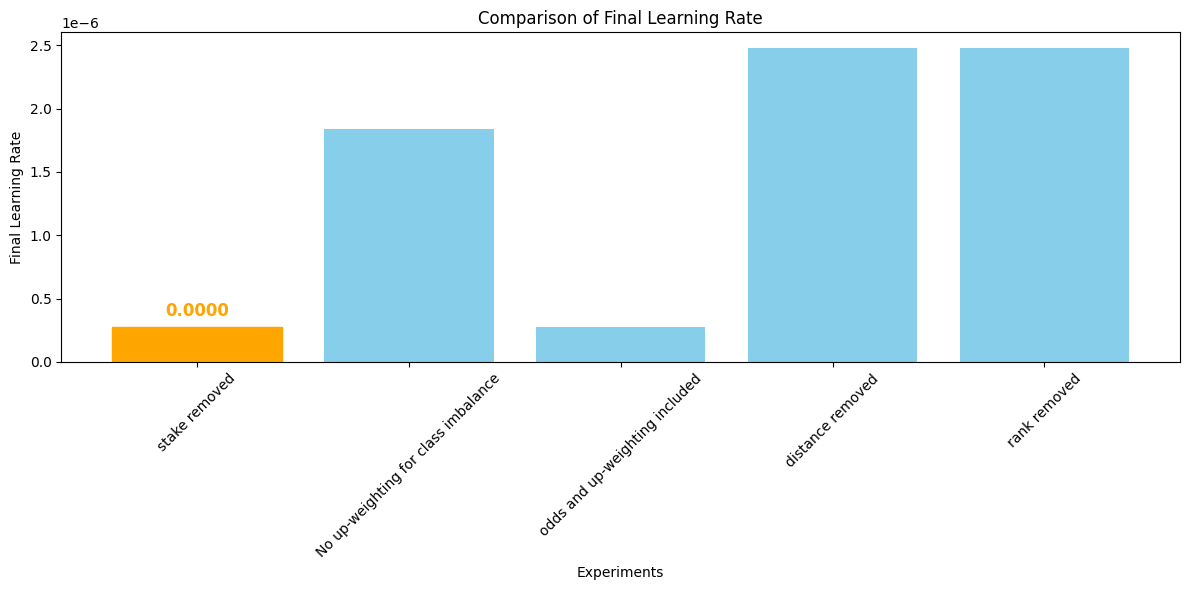

In [ ]:
import matplotlib.pyplot as plt

# Convert metrics_combined to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_combined).T

# Define the display names mapping
display_names = {
    'LSTM_XGBfeatures_nostake': 'stake removed',
    'LSTM_XGBfeatures_noweightbalance': 'No up-weighting for class imbalance',
    'LSTM_XGBfeaturesandODDSandWeightbalance': 'odds and up-weighting included',
    'LSTM_nodistance': 'distance removed',
    'LSTM_norank': 'rank removed'
}

# Update the index of metrics_df with display names
metrics_df.rename(index=display_names, inplace=True)

# Define the metrics for which we will highlight the highest and lowest bars
highlight_max_metrics = ['Final Accuracy', 'Precision', 'Recall', 'F1 Score']
highlight_min_metrics = ['Final Loss', 'Final MAE', 'Final MSE', 'Final Learning Rate']

# Function to plot bar charts with highlighting
def plot_metric(metric, highlight_max=True):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(metrics_df.index, metrics_df[metric], color='skyblue')

    if highlight_max:
        max_value = metrics_df[metric].max()
        max_index = metrics_df[metric].idxmax()
        bar_index = list(metrics_df.index).index(max_index)
        bars[bar_index].set_color('orange')
        plt.annotate(f'{max_value:.4f}', xy=(bar_index, max_value), xytext=(0, 5),
                     textcoords='offset points', ha='center', va='bottom', fontsize=12, color='orange', fontweight='bold')
    else:
        min_value = metrics_df[metric].min()
        min_index = metrics_df[metric].idxmin()
        bar_index = list(metrics_df.index).index(min_index)
        bars[bar_index].set_color('orange')
        plt.annotate(f'{min_value:.4f}', xy=(bar_index, min_value), xytext=(0, 5),
                     textcoords='offset points', ha='center', va='bottom', fontsize=12, color='orange', fontweight='bold')

    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xlabel('Experiments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each metric individually
for metric in highlight_max_metrics:
    plot_metric(metric, highlight_max=True)

for metric in highlight_min_metrics:
    plot_metric(metric, highlight_max=False)


In [ ]:
# Convert metrics_combined to DataFrame
metrics_df = pd.DataFrame(metrics_combined).T

# Define the baseline
baseline = 'LSTM_XGBfeatures_noweightbalance'

# Calculate the best values for each metric
best_values = metrics_df.max()

# Calculate the differences to the baseline
differences_to_baseline = metrics_df.subtract(metrics_df.loc[baseline])

# Display the results
print("Best Values for Each Metric:")
print(best_values)
print("\nDifferences to Baseline:")
print(differences_to_baseline)

Best Values for Each Metric:
F1 Score               0.588647
Precision              0.572168
Recall                 0.662366
Final Accuracy         0.737237
Final Loss             0.572856
Final MAE              0.393696
Final MSE              0.188023
Final Learning Rate    0.000002
dtype: float64

Differences to Baseline:
                                         F1 Score  Precision    Recall  \
LSTM_XGBfeatures_nostake                 0.063940  -0.028819  0.167606   
LSTM_XGBfeatures_noweightbalance         0.000000   0.000000  0.000000   
LSTM_XGBfeaturesandODDSandWeightbalance  0.062719  -0.030771  0.167569   
LSTM_nodistance                          0.021622   0.013654  0.027964   
LSTM_norank                              0.021622   0.013654  0.027964   

                                         Final Accuracy  Final Loss  \
LSTM_XGBfeatures_nostake                      -0.005045    0.036726   
LSTM_XGBfeatures_noweightbalance               0.000000    0.000000   
LSTM_XGBfeatures

In [ ]:
# Convert metrics_combined to DataFrame
metrics_df = pd.DataFrame(metrics_combined).T

# Define the baseline
baseline = 'LSTM_XGBfeatures_noweightbalance'

# Calculate the best values for each metric
best_values = metrics_df.max()

# Calculate the percentage differences to the baseline
percent_differences_to_baseline = (metrics_df.subtract(metrics_df.loc[baseline]) / metrics_df.loc[baseline]) * 100

# Display the results
print("Best Values for Each Metric:")
print(best_values)
print("\nPercentage Differences to Baseline:")
print(percent_differences_to_baseline)

Best Values for Each Metric:
F1 Score               0.588647
Precision              0.572168
Recall                 0.662366
Final Accuracy         0.737237
Final Loss             0.572856
Final MAE              0.393696
Final MSE              0.188023
Final Learning Rate    0.000002
dtype: float64

Percentage Differences to Baseline:
                                          F1 Score  Precision     Recall  \
LSTM_XGBfeatures_nostake                 12.185886  -5.159988  33.876318   
LSTM_XGBfeatures_noweightbalance          0.000000   0.000000   0.000000   
LSTM_XGBfeaturesandODDSandWeightbalance  11.953080  -5.509416  33.868873   
LSTM_nodistance                           4.120745   2.444682   5.651968   
LSTM_norank                               4.120745   2.444682   5.651968   

                                         Final Accuracy  Final Loss  \
LSTM_XGBfeatures_nostake                      -0.684287    6.932086   
LSTM_XGBfeatures_noweightbalance               0.000000    0.000

In [ ]:
metrics_df.to_csv('/content/metrics_df.csv')